# 데이터 준비

In [1]:
!rm -rf cat*
!wget https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/data/cat_and_dog.zip

--2021-12-27 01:15:07--  https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/data/cat_and_dog.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/data/cat_and_dog.zip [following]
--2021-12-27 01:15:07--  https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/data/cat_and_dog.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18902400 (18M) [application/zip]
Saving to: ‘cat_and_dog.zip’

cat_and_dog.zip     100%[===================>]  18.03M  --.-KB/s    in 0.06s   

2021-12-27 01:15:08 (279 MB/s) - ‘cat_and_dog

In [2]:
!unzip cat_and_dog.zip

Archive:  cat_and_dog.zip
   creating: cat_and_dog/
   creating: cat_and_dog/test/
   creating: cat_and_dog/test/Cat/
  inflating: cat_and_dog/test/Cat/189.jpg  
  inflating: cat_and_dog/test/Cat/200.jpg  
  inflating: cat_and_dog/test/Cat/229.jpg  
  inflating: cat_and_dog/test/Cat/89.jpg  
  inflating: cat_and_dog/test/Cat/60.jpg  
  inflating: cat_and_dog/test/Cat/149.jpg  
  inflating: cat_and_dog/test/Cat/160.jpg  
  inflating: cat_and_dog/test/Cat/49.jpg  
  inflating: cat_and_dog/test/Cat/59.jpg  
  inflating: cat_and_dog/test/Cat/170.jpg  
  inflating: cat_and_dog/test/Cat/159.jpg  
  inflating: cat_and_dog/test/Cat/70.jpg  
  inflating: cat_and_dog/test/Cat/99.jpg  
  inflating: cat_and_dog/test/Cat/239.jpg  
  inflating: cat_and_dog/test/Cat/210.jpg  
  inflating: cat_and_dog/test/Cat/199.jpg  
  inflating: cat_and_dog/test/Cat/9.jpg  
  inflating: cat_and_dog/test/Cat/129.jpg  
  inflating: cat_and_dog/test/Cat/289.jpg  
  inflating: cat_and_dog/test/Cat/100.jpg  
  inflatin

In [4]:
!apt-get update
!apt install tree

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.

In [6]:
!tree -d cat_and_dog

cat_and_dog
├── test
│   ├── Cat
│   └── Dog
└── train
    ├── Cat
    └── Dog

6 directories


In [9]:
!ls -al cat_and_dog/train/Cat/*.jpg | wc
!ls -al cat_and_dog/train/Dog/*.jpg | wc
!ls -al cat_and_dog/test/Cat/*.jpg | wc
!ls -al cat_and_dog/test/Dog/*.jpg | wc

    240    2160   17432
    240    2160   17432
     61     549    4370
     61     549    4370


# 모델 학습

In [13]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

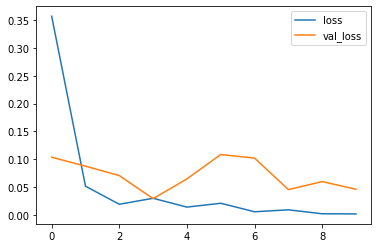

loss =  0.0014688700903207064 , val_loss =  0.04585519805550575
8/8 [==============================] - 6s 808ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0459 - val_acc: 0.9918


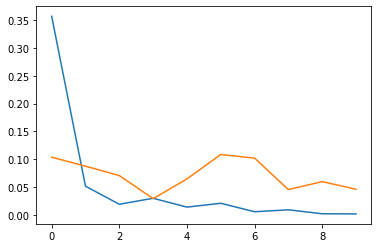

2/2 [==============================] - 0s 192ms/step - loss: 0.0459 - acc: 0.9918
loss= 0.045855190604925156
acc= 0.9918032884597778


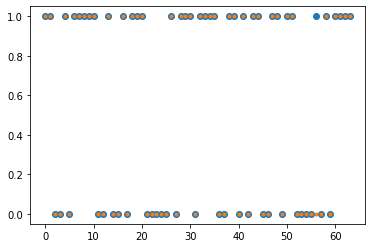

label category index = 1.0
predicted category index = 1
predicted category name = Dog


In [14]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))  # <-------------------------

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "cat_and_dog/train",  # <-------------------------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "cat_and_dog/test",  # <-------------------------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


plot_losses = PlotLosses()  # <-------------------------
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10,               # <-------------------------
      callbacks=[plot_losses]  # <-------------------------
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 모델 저장

In [15]:
model.save("my_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [17]:
from tensorflow import keras
loaded_model = keras.models.load_model("my_model.h5")

# 로드한 모델 평가

In [18]:
loss, acc = loaded_model.evaluate(test_data_generator)
print("losss =", loss)
print("acc =", acc)

2/2 [==============================] - 3s 191ms/step - loss: 0.0359 - acc: 0.9836
losss = 0.03593911975622177
acc = 0.9836065769195557


# 로드한 모델 예측

In [31]:
y_ = loaded_model.predict(test_data_generator)
predicted = np.argmax(y_, axis=-1)
print(predicted)

[0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 0 0 0]


# 영상 그리면서 결과 보기

predicted=0, truth=0.0


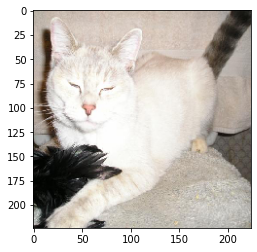

predicted=0, truth=0.0


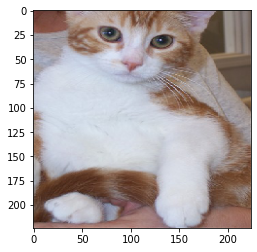

predicted=0, truth=0.0


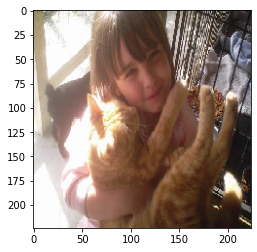

predicted=0, truth=0.0


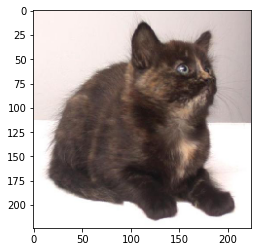

predicted=1, truth=1.0


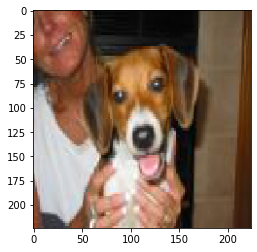

In [40]:
batch_x, batch_y = next(test_data_generator)
# print(batch_x.shape)
# print(batch_y.shape)

y_ = loaded_model.predict(test_data_generator)
predicted = np.argmax(y_, axis=-1)
# print(predicted)

for i in range(5):
  plt.imshow(batch_x[i].astype(np.int16))
  print("predicted={}, truth={}".format(predicted[i], batch_y[i]))
  plt.show()


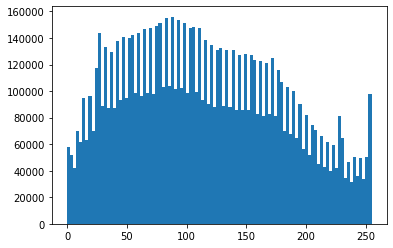

[20.  9.  5. ... 56. 66. 68.]


In [36]:
plt.hist(batch_x.flatten(), bins=100)
plt.show()
print(batch_x[0].flatten())

# TensorFlow 포멧으로 저장

In [41]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [42]:
loaded_model = keras.models.load_model("my_model")

# weigth로 저장 로딩

In [44]:
model.save_weights("my_model_weigth")

In [45]:
model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))  # <-------------------------

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()


model.load_weights("my_model_weigth")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_4 (Flatten)         (None, 68992)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 2)                 514       
                                                                 
Total params: 25,432,315
Trainable params: 17,663,234
Non-trainable params: 7,769,081
__________________________________